# Volume Calculator for K-12 Students

## What is Volume?

Volume tells us how much space is inside a 3D shape. Think of it as how much water you could pour into a container. We measure volume in cubic units like cm³ or m³.

## Why Use This Calculator?

This Python tool helps students:
- See 3D shapes while calculating volumes
- Check homework answers quickly
- Understand how changing dimensions affects volume
- Practice with different geometric solids

## Available Shapes

The calculator works with these common solids:

**Cube** - All sides equal (V = s³)
**Rectangular Prism** - Box shape (V = l×w×h)
**Cylinder** - Can or pipe shape (V = πr²h)
**Cone** - Ice cream cone shape (V = ⅓πr²h)
**Sphere** - Ball shape (V = ⅔πr³)
**Square Pyramid** - Egyptian pyramid (V = ⅓×base²×h)
**Triangular Prism** - Triangle stretched out (V = ½×base×tri_h×prism_h)

## How to Use in Google Colab

### Setup (run once):

In [ ]:
volume_calculator_menu()

In [ ]:
quick_calculate('cube', side_length=5)
quick_calculate('cylinder', radius=3, height=7)
quick_calculate('sphere', radius=4)

In [ ]:
example_problems()

In [ ]:
quick_calculate('cube', side_length=3)
quick_calculate('cube', side_length=6.5)

In [ ]:
quick_calculate('rectangular_prism', length=5, width=3, height=4)
quick_calculate('rectangular_prism', length=8.2, width=6, height=2.5)

In [ ]:
quick_calculate('cylinder', radius=2.5, height=8)
quick_calculate('cylinder', radius=4, height=6)

In [ ]:
quick_calculate('cone', radius=3, height=9)
quick_calculate('cone', radius=2, height=5.5)

In [ ]:
quick_calculate('sphere', radius=3)
quick_calculate('sphere', radius=7.2)

In [ ]:
quick_calculate('pyramid', base_side=4, height=6)
quick_calculate('pyramid', base_side=3.5, height=8.2)

In [ ]:
quick_calculate('triangular_prism', base=6, triangle_height=4, prism_height=8)
quick_calculate('triangular_prism', base=5.5, triangle_height=3.2, prism_height=10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

class VolumeCalculator:
    """
    A comprehensive volume calculator for K-12 students with 3D visualizations.
    Supports various geometric solids with interactive parameter input.
    """

    def __init__(self):
        self.solids = {
            'cube': 'Cube',
            'rectangular_prism': 'Rectangular Prism',
            'cylinder': 'Cylinder',
            'cone': 'Cone',
            'sphere': 'Sphere',
            'pyramid': 'Square Pyramid',
            'triangular_prism': 'Triangular Prism'
        }

    def calculate_cube_volume(self, side_length):
        """Calculate volume of a cube: V = s³"""
        volume = side_length ** 3
        return volume, f"V = s³ = {side_length}³ = {volume:.2f} cubic units"

    def calculate_rectangular_prism_volume(self, length, width, height):
        """Calculate volume of a rectangular prism: V = l × w × h"""
        volume = length * width * height
        return volume, f"V = l × w × h = {length} × {width} × {height} = {volume:.2f} cubic units"

    def calculate_cylinder_volume(self, radius, height):
        """Calculate volume of a cylinder: V = πr²h"""
        volume = math.pi * radius ** 2 * height
        return volume, f"V = πr²h = π × {radius}² × {height} = {volume:.2f} cubic units"

    def calculate_cone_volume(self, radius, height):
        """Calculate volume of a cone: V = (1/3)πr²h"""
        volume = (1/3) * math.pi * radius ** 2 * height
        return volume, f"V = (1/3)πr²h = (1/3) × π × {radius}² × {height} = {volume:.2f} cubic units"

    def calculate_sphere_volume(self, radius):
        """Calculate volume of a sphere: V = (4/3)πr³"""
        volume = (4/3) * math.pi * radius ** 3
        return volume, f"V = (4/3)πr³ = (4/3) × π × {radius}³ = {volume:.2f} cubic units"

    def calculate_pyramid_volume(self, base_side, height):
        """Calculate volume of a square pyramid: V = (1/3) × base_area × height"""
        base_area = base_side ** 2
        volume = (1/3) * base_area * height
        return volume, f"V = (1/3) × base_area × h = (1/3) × {base_side}² × {height} = {volume:.2f} cubic units"

    def calculate_triangular_prism_volume(self, base, triangle_height, prism_height):
        """Calculate volume of a triangular prism: V = (1/2) × base × triangle_height × prism_height"""
        volume = 0.5 * base * triangle_height * prism_height
        return volume, f"V = (1/2) × base × triangle_height × prism_height = (1/2) × {base} × {triangle_height} × {prism_height} = {volume:.2f} cubic units"

    def visualize_cube(self, side_length):
        """Create 3D visualization of a cube"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Define vertices of a cube
        vertices = np.array([
            [0, 0, 0], [side_length, 0, 0], [side_length, side_length, 0], [0, side_length, 0],
            [0, 0, side_length], [side_length, 0, side_length], [side_length, side_length, side_length], [0, side_length, side_length]
        ])

        # Define the 12 edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],  # bottom face
            [4, 5], [5, 6], [6, 7], [7, 4],  # top face
            [0, 4], [1, 5], [2, 6], [3, 7]   # vertical edges
        ]

        # Plot edges
        for edge in edges:
            points = vertices[edge]
            ax.plot3D(*points.T, 'b-', linewidth=2)

        # Fill faces
        from mpl_toolkits.mplot3d.art3d import Poly3DCollection
        faces = [
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # bottom
            [vertices[4], vertices[5], vertices[6], vertices[7]],  # top
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # front
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # back
            [vertices[1], vertices[2], vertices[6], vertices[5]],  # right
            [vertices[4], vertices[7], vertices[3], vertices[0]]   # left
        ]

        ax.add_collection3d(Poly3DCollection(faces, facecolors='lightblue', linewidths=1, edgecolors='blue', alpha=0.7))

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Cube (side = {side_length})')
        plt.show()

    def visualize_rectangular_prism(self, length, width, height):
        """Create 3D visualization of a rectangular prism"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Define vertices
        vertices = np.array([
            [0, 0, 0], [length, 0, 0], [length, width, 0], [0, width, 0],
            [0, 0, height], [length, 0, height], [length, width, height], [0, width, height]
        ])

        # Define edges
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]

        # Plot edges
        for edge in edges:
            points = vertices[edge]
            ax.plot3D(*points.T, 'b-', linewidth=2)

        # Fill faces
        from mpl_toolkits.mplot3d.art3d import Poly3DCollection
        faces = [
            [vertices[0], vertices[1], vertices[2], vertices[3]],
            [vertices[4], vertices[5], vertices[6], vertices[7]],
            [vertices[0], vertices[1], vertices[5], vertices[4]],
            [vertices[2], vertices[3], vertices[7], vertices[6]],
            [vertices[1], vertices[2], vertices[6], vertices[5]],
            [vertices[4], vertices[7], vertices[3], vertices[0]]
        ]

        ax.add_collection3d(Poly3DCollection(faces, facecolors='lightgreen', linewidths=1, edgecolors='green', alpha=0.7))

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Rectangular Prism ({length} × {width} × {height})')
        plt.show()

    def visualize_cylinder(self, radius, height):
        """Create 3D visualization of a cylinder"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Create cylinder
        theta = np.linspace(0, 2*np.pi, 50)
        z = np.linspace(0, height, 50)

        # Cylindrical surface
        theta_mesh, z_mesh = np.meshgrid(theta, z)
        x_mesh = radius * np.cos(theta_mesh)
        y_mesh = radius * np.sin(theta_mesh)

        ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.7, color='lightcoral')

        # Top and bottom circles
        theta_circle = np.linspace(0, 2*np.pi, 50)
        x_circle = radius * np.cos(theta_circle)
        y_circle = radius * np.sin(theta_circle)

        # Bottom circle
        ax.plot(x_circle, y_circle, 0, 'r-', linewidth=2)
        # Top circle
        ax.plot(x_circle, y_circle, height, 'r-', linewidth=2)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Cylinder (r = {radius}, h = {height})')
        ax.set_box_aspect([1,1,height/radius])
        plt.show()

    def visualize_cone(self, radius, height):
        """Create 3D visualization of a cone"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Create cone
        theta = np.linspace(0, 2*np.pi, 50)
        z = np.linspace(0, height, 50)

        theta_mesh, z_mesh = np.meshgrid(theta, z)
        r_mesh = radius * (1 - z_mesh/height)  # Radius decreases linearly with height
        x_mesh = r_mesh * np.cos(theta_mesh)
        y_mesh = r_mesh * np.sin(theta_mesh)

        ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.7, color='lightyellow')

        # Base circle
        theta_circle = np.linspace(0, 2*np.pi, 50)
        x_circle = radius * np.cos(theta_circle)
        y_circle = radius * np.sin(theta_circle)
        ax.plot(x_circle, y_circle, 0, 'orange', linewidth=2)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Cone (r = {radius}, h = {height})')
        ax.set_box_aspect([1,1,height/radius])
        plt.show()

    def visualize_sphere(self, radius):
        """Create 3D visualization of a sphere"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Create sphere
        u = np.linspace(0, 2 * np.pi, 50)
        v = np.linspace(0, np.pi, 50)
        x = radius * np.outer(np.cos(u), np.sin(v))
        y = radius * np.outer(np.sin(u), np.sin(v))
        z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

        ax.plot_surface(x, y, z, alpha=0.7, color='lightpink')

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Sphere (r = {radius})')
        ax.set_box_aspect([1,1,1])
        plt.show()

    def visualize_pyramid(self, base_side, height):
        """Create 3D visualization of a square pyramid"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Define vertices
        vertices = np.array([
            [0, 0, 0], [base_side, 0, 0], [base_side, base_side, 0], [0, base_side, 0],  # base
            [base_side/2, base_side/2, height]  # apex
        ])

        # Define faces
        from mpl_toolkits.mplot3d.art3d import Poly3DCollection
        faces = [
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # base
            [vertices[0], vertices[1], vertices[4]],  # triangular faces
            [vertices[1], vertices[2], vertices[4]],
            [vertices[2], vertices[3], vertices[4]],
            [vertices[3], vertices[0], vertices[4]]
        ]

        ax.add_collection3d(Poly3DCollection(faces, facecolors='lightsteelblue', linewidths=1, edgecolors='steelblue', alpha=0.7))

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Square Pyramid (base = {base_side}, h = {height})')
        plt.show()

    def visualize_triangular_prism(self, base, triangle_height, prism_height):
        """Create 3D visualization of a triangular prism"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Define vertices of triangular prism
        vertices = np.array([
            [0, 0, 0], [base, 0, 0], [base/2, triangle_height, 0],  # bottom triangle
            [0, 0, prism_height], [base, 0, prism_height], [base/2, triangle_height, prism_height]  # top triangle
        ])

        # Define faces
        from mpl_toolkits.mplot3d.art3d import Poly3DCollection
        faces = [
            [vertices[0], vertices[1], vertices[2]],  # bottom triangle
            [vertices[3], vertices[4], vertices[5]],  # top triangle
            [vertices[0], vertices[1], vertices[4], vertices[3]],  # rectangular faces
            [vertices[1], vertices[2], vertices[5], vertices[4]],
            [vertices[2], vertices[0], vertices[3], vertices[5]]
        ]

        ax.add_collection3d(Poly3DCollection(faces, facecolors='lightseagreen', linewidths=1, edgecolors='seagreen', alpha=0.7))

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Triangular Prism (base = {base}, tri_h = {triangle_height}, h = {prism_height})')
        plt.show()

    def solve_problem(self, solid_type, **params):
        """Main method to solve volume problems"""
        print("="*60)
        print(f"VOLUME CALCULATION: {self.solids[solid_type].upper()}")
        print("="*60)

        if solid_type == 'cube':
            side = params['side_length']
            volume, formula = self.calculate_cube_volume(side)
            self.visualize_cube(side)

        elif solid_type == 'rectangular_prism':
            l, w, h = params['length'], params['width'], params['height']
            volume, formula = self.calculate_rectangular_prism_volume(l, w, h)
            self.visualize_rectangular_prism(l, w, h)

        elif solid_type == 'cylinder':
            r, h = params['radius'], params['height']
            volume, formula = self.calculate_cylinder_volume(r, h)
            self.visualize_cylinder(r, h)

        elif solid_type == 'cone':
            r, h = params['radius'], params['height']
            volume, formula = self.calculate_cone_volume(r, h)
            self.visualize_cone(r, h)

        elif solid_type == 'sphere':
            r = params['radius']
            volume, formula = self.calculate_sphere_volume(r)
            self.visualize_sphere(r)

        elif solid_type == 'pyramid':
            base, h = params['base_side'], params['height']
            volume, formula = self.calculate_pyramid_volume(base, h)
            self.visualize_pyramid(base, h)

        elif solid_type == 'triangular_prism':
            base, tri_h, prism_h = params['base'], params['triangle_height'], params['prism_height']
            volume, formula = self.calculate_triangular_prism_volume(base, tri_h, prism_h)
            self.visualize_triangular_prism(base, tri_h, prism_h)

        print(f"\n📐 FORMULA: {formula}")
        print(f"📊 RESULT: The volume is {volume:.2f} cubic units")
        print(f"📏 ROUNDED: {round(volume)} cubic units")
        print("="*60)

        return volume

# Interactive functions for each solid type
def interactive_cube():
    """Interactive cube volume calculator"""
    calc = VolumeCalculator()

    @interact(side_length=widgets.FloatSlider(value=3, min=0.5, max=10, step=0.5, description='Side Length:'))
    def cube_calc(side_length):
        calc.solve_problem('cube', side_length=side_length)

def interactive_rectangular_prism():
    """Interactive rectangular prism volume calculator"""
    calc = VolumeCalculator()

    @interact(
        length=widgets.FloatSlider(value=4, min=1, max=10, step=0.5, description='Length:'),
        width=widgets.FloatSlider(value=3, min=1, max=10, step=0.5, description='Width:'),
        height=widgets.FloatSlider(value=5, min=1, max=10, step=0.5, description='Height:')
    )
    def prism_calc(length, width, height):
        calc.solve_problem('rectangular_prism', length=length, width=width, height=height)

def interactive_cylinder():
    """Interactive cylinder volume calculator"""
    calc = VolumeCalculator()

    @interact(
        radius=widgets.FloatSlider(value=2, min=0.5, max=5, step=0.5, description='Radius:'),
        height=widgets.FloatSlider(value=6, min=1, max=10, step=0.5, description='Height:')
    )
    def cylinder_calc(radius, height):
        calc.solve_problem('cylinder', radius=radius, height=height)

def interactive_cone():
    """Interactive cone volume calculator"""
    calc = VolumeCalculator()

    @interact(
        radius=widgets.FloatSlider(value=3, min=0.5, max=5, step=0.5, description='Radius:'),
        height=widgets.FloatSlider(value=4, min=1, max=10, step=0.5, description='Height:')
    )
    def cone_calc(radius, height):
        calc.solve_problem('cone', radius=radius, height=height)

def interactive_sphere():
    """Interactive sphere volume calculator"""
    calc = VolumeCalculator()

    @interact(radius=widgets.FloatSlider(value=3, min=0.5, max=5, step=0.5, description='Radius:'))
    def sphere_calc(radius):
        calc.solve_problem('sphere', radius=radius)

def interactive_pyramid():
    """Interactive pyramid volume calculator"""
    calc = VolumeCalculator()

    @interact(
        base_side=widgets.FloatSlider(value=4, min=1, max=8, step=0.5, description='Base Side:'),
        height=widgets.FloatSlider(value=5, min=1, max=10, step=0.5, description='Height:')
    )
    def pyramid_calc(base_side, height):
        calc.solve_problem('pyramid', base_side=base_side, height=height)

def interactive_triangular_prism():
    """Interactive triangular prism volume calculator"""
    calc = VolumeCalculator()

    @interact(
        base=widgets.FloatSlider(value=4, min=1, max=8, step=0.5, description='Triangle Base:'),
        triangle_height=widgets.FloatSlider(value=3, min=1, max=6, step=0.5, description='Triangle Height:'),
        prism_height=widgets.FloatSlider(value=5, min=1, max=10, step=0.5, description='Prism Height:')
    )
    def tri_prism_calc(base, triangle_height, prism_height):
        calc.solve_problem('triangular_prism', base=base, triangle_height=triangle_height, prism_height=prism_height)

# Main menu function
def volume_calculator_menu():
    """Main interactive menu for the volume calculator"""

    print("🎓 K-12 VOLUME CALCULATOR WITH 3D VISUALIZATIONS 🎓")
    print("="*60)
    print("Choose a solid to calculate its volume and see a 3D visualization!")
    print("="*60)

    calc = VolumeCalculator()

    solid_options = [
        ('Cube', 'cube'),
        ('Rectangular Prism', 'rectangular_prism'),
        ('Cylinder', 'cylinder'),
        ('Cone', 'cone'),
        ('Sphere', 'sphere'),
        ('Square Pyramid', 'pyramid'),
        ('Triangular Prism', 'triangular_prism')
    ]

    dropdown = widgets.Dropdown(
        options=solid_options,
        value='cube',
        description='Select Solid:',
        style={'description_width': 'initial'}
    )

    def on_solid_change(change):
        solid_type = change['new']
        print(f"\n🔵 Selected: {calc.solids[solid_type]}")

        if solid_type == 'cube':
            print("📝 Instructions: Adjust the side length using the slider below.")
            interactive_cube()

        elif solid_type == 'rectangular_prism':
            print("📝 Instructions: Adjust the length, width, and height using the sliders below.")
            interactive_rectangular_prism()

        elif solid_type == 'cylinder':
            print("📝 Instructions: Adjust the radius and height using the sliders below.")
            interactive_cylinder()

        elif solid_type == 'cone':
            print("📝 Instructions: Adjust the radius and height using the sliders below.")
            interactive_cone()

        elif solid_type == 'sphere':
            print("📝 Instructions: Adjust the radius using the slider below.")
            interactive_sphere()

        elif solid_type == 'pyramid':
            print("📝 Instructions: Adjust the base side length and height using the sliders below.")
            interactive_pyramid()

        elif solid_type == 'triangular_prism':
            print("📝 Instructions: Adjust the triangle base, triangle height, and prism height using the sliders below.")
            interactive_triangular_prism()

    dropdown.observe(on_solid_change, names='value')
    display(dropdown)

    # Initialize with cube
    print(f"\n🔵 Selected: {calc.solids['cube']}")
    print("📝 Instructions: Adjust the side length using the slider below.")
    interactive_cube()

# Example problems for students
def example_problems():
    """Provide example problems for students to practice"""
    print("📚 EXAMPLE PROBLEMS FOR PRACTICE")
    print("="*50)

    examples = [
        {
            'problem': "A cube-shaped box has sides of 4 meters. What is its volume?",
            'solid': 'cube',
            'params': {'side_length': 4},
            'answer': 64
        },
        {
            'problem': "A cylindrical water tank has a radius of 3 feet and height of 8 feet. How much water can it hold?",
            'solid': 'cylinder',
            'params': {'radius': 3, 'height': 8},
            'answer': 226.19
        },
        {
            'problem': "A basketball has a radius of 12 cm. What is its volume?",
            'solid': 'sphere',
            'params': {'radius': 12},
            'answer': 7238.23
        },
        {
            'problem': "A rectangular swimming pool is 10m long, 5m wide, and 2m deep. What is its volume?",
            'solid': 'rectangular_prism',
            'params': {'length': 10, 'width': 5, 'height': 2},
            'answer': 100
        }
    ]

    calc = VolumeCalculator()

    for i, example in enumerate(examples, 1):
        print(f"\n{i}. {example['problem']}")
        volume = calc.solve_problem(example['solid'], **example['params'])
        print(f"✅ Expected Answer: {example['answer']:.2f} cubic units")
        print("-" * 50)

# Quick calculation function without visualization
def quick_calculate(solid_type, **params):
    """Quick calculation without 3D visualization for homework checking"""
    calc = VolumeCalculator()

    if solid_type == 'cube':
        volume, formula = calc.calculate_cube_volume(params['side_length'])
    elif solid_type == 'rectangular_prism':
        volume, formula = calc.calculate_rectangular_prism_volume(params['length'], params['width'], params['height'])
    elif solid_type == 'cylinder':
        volume, formula = calc.calculate_cylinder_volume(params['radius'], params['height'])
    elif solid_type == 'cone':
        volume, formula = calc.calculate_cone_volume(params['radius'], params['height'])
    elif solid_type == 'sphere':
        volume, formula = calc.calculate_sphere_volume(params['radius'])
    elif solid_type == 'pyramid':
        volume, formula = calc.calculate_pyramid_volume(params['base_side'], params['height'])
    elif solid_type == 'triangular_prism':
        volume, formula = calc.calculate_triangular_prism_volume(params['base'], params['triangle_height'], params['prism_height'])

    print(f"📐 {formula}")
    return volume

# Usage instructions
def show_instructions():
    """Display usage instructions for students and teachers"""
    print("🎯 HOW TO USE THIS VOLUME CALCULATOR")
    print("="*50)
    print("""
📋 FOR STUDENTS:
1. Run: volume_calculator_menu()
   - This opens an interactive menu with sliders
   - Choose your solid from the dropdown
   - Adjust parameters with sliders
   - See the 3D shape and volume calculation instantly!

2. For practice problems, run: example_problems()

3. For quick homework checks, use: quick_calculate()
   Examples:
   - quick_calculate('cube', side_length=5)
   - quick_calculate('cylinder', radius=2, height=7)
   - quick_calculate('sphere', radius=4)

👩‍🏫 FOR TEACHERS:
- Use this in Google Colab for interactive lessons
- Students can experiment with different parameters
- Visual learning helps with spatial understanding
- All formulas are clearly displayed

🔧 INSTALLATION (Run once in Colab):
!pip install ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

Then run any of the functions above!
    """)

# Initialize and show instructions
if __name__ == "__main__":
    show_instructions()
    print("\n🚀 Ready to start! Run volume_calculator_menu() to begin!")

# Quick start examples
print("\n💡 QUICK START EXAMPLES:")
print("volume_calculator_menu()  # Interactive menu")
print("example_problems()        # Practice problems")
print("quick_calculate('cube', side_length=3)  # Quick calculation")

🎯 HOW TO USE THIS VOLUME CALCULATOR

📋 FOR STUDENTS:
1. Run: volume_calculator_menu()
   - This opens an interactive menu with sliders
   - Choose your solid from the dropdown
   - Adjust parameters with sliders
   - See the 3D shape and volume calculation instantly!

2. For practice problems, run: example_problems()

3. For quick homework checks, use: quick_calculate()
   Examples:
   - quick_calculate('cube', side_length=5)
   - quick_calculate('cylinder', radius=2, height=7)
   - quick_calculate('sphere', radius=4)

👩‍🏫 FOR TEACHERS:
- Use this in Google Colab for interactive lessons
- Students can experiment with different parameters
- Visual learning helps with spatial understanding
- All formulas are clearly displayed

🔧 INSTALLATION (Run once in Colab):
!pip install ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

Then run any of the functions above!
    

🚀 Ready to start! Run volume_calculator_menu() to begin!

💡 QUICK START EXAMPLES:
volume_ca

🎓 K-12 VOLUME CALCULATOR WITH 3D VISUALIZATIONS 🎓
Choose a solid to calculate its volume and see a 3D visualization!


Dropdown(description='Select Solid:', options=(('Cube', 'cube'), ('Rectangular Prism', 'rectangular_prism'), (…


🔵 Selected: Cube
📝 Instructions: Adjust the side length using the slider below.


interactive(children=(FloatSlider(value=3.0, description='Side Length:', max=10.0, min=0.5, step=0.5), Output(…

📐 V = πr²h = π × 2² × 5 = 62.83 cubic units
📚 EXAMPLE PROBLEMS FOR PRACTICE

1. A cube-shaped box has sides of 4 meters. What is its volume?
VOLUME CALCULATION: CUBE


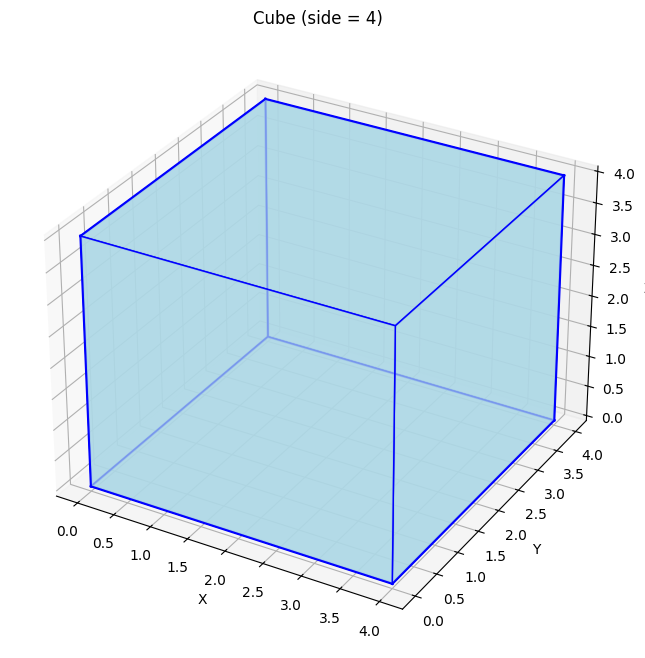


📐 FORMULA: V = s³ = 4³ = 64.00 cubic units
📊 RESULT: The volume is 64.00 cubic units
📏 ROUNDED: 64 cubic units
✅ Expected Answer: 64.00 cubic units
--------------------------------------------------

2. A cylindrical water tank has a radius of 3 feet and height of 8 feet. How much water can it hold?
VOLUME CALCULATION: CYLINDER


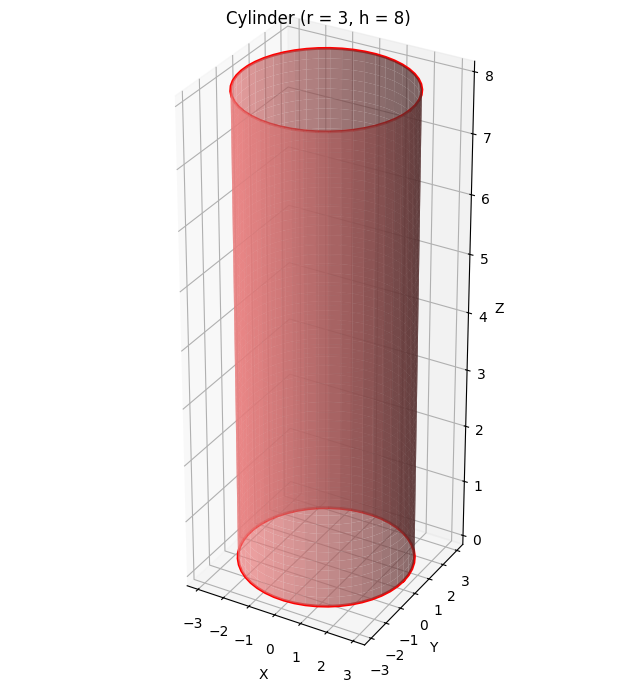


📐 FORMULA: V = πr²h = π × 3² × 8 = 226.19 cubic units
📊 RESULT: The volume is 226.19 cubic units
📏 ROUNDED: 226 cubic units
✅ Expected Answer: 226.19 cubic units
--------------------------------------------------

3. A basketball has a radius of 12 cm. What is its volume?
VOLUME CALCULATION: SPHERE


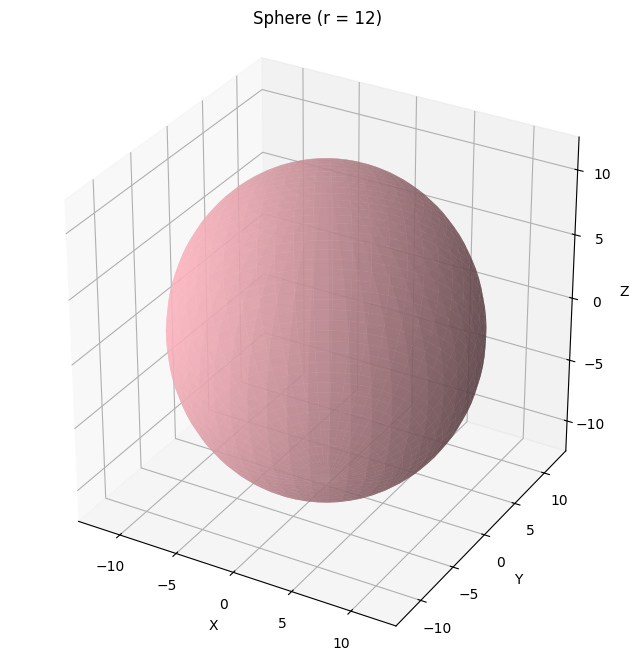


📐 FORMULA: V = (4/3)πr³ = (4/3) × π × 12³ = 7238.23 cubic units
📊 RESULT: The volume is 7238.23 cubic units
📏 ROUNDED: 7238 cubic units
✅ Expected Answer: 7238.23 cubic units
--------------------------------------------------

4. A rectangular swimming pool is 10m long, 5m wide, and 2m deep. What is its volume?
VOLUME CALCULATION: RECTANGULAR PRISM


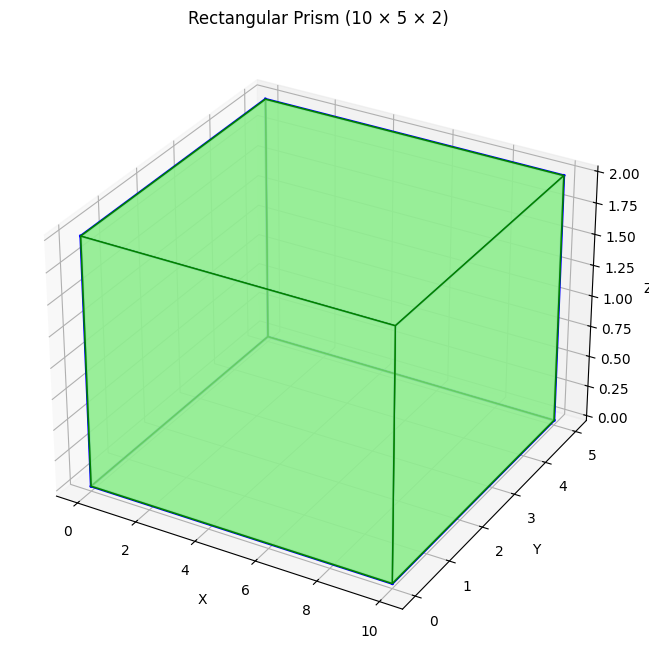


📐 FORMULA: V = l × w × h = 10 × 5 × 2 = 100.00 cubic units
📊 RESULT: The volume is 100.00 cubic units
📏 ROUNDED: 100 cubic units
✅ Expected Answer: 100.00 cubic units
--------------------------------------------------

🔵 Selected: Rectangular Prism
📝 Instructions: Adjust the length, width, and height using the sliders below.


interactive(children=(FloatSlider(value=4.0, description='Length:', max=10.0, min=1.0, step=0.5), FloatSlider(…

In [ ]:
# Interactive exploration
volume_calculator_menu()

# Quick homework check
quick_calculate('cylinder', radius=2, height=5)

# Practice problems
example_problems()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

class VolumeCalculator:
    """
    A comprehensive volume calculator for K-12 students with 3D visualizations.
    Supports various geometric solids with interactive parameter input.
    """

    def __init__(self):
        self.solids = {
            'cube': 'Cube',
            'rectangular_prism': 'Rectangular Prism',
            'cylinder': 'Cylinder',
            'cone': 'Cone',
            'sphere': 'Sphere',
            'pyramid': 'Square Pyramid',
            'triangular_prism': 'Triangular Prism'
        }

    def calculate_cube_volume(self, side_length):
        """Calculate volume of a cube: V = s³"""
        volume = side_length ** 3
        return volume, f"V = s³ = {side_length}³ = {volume:.2f} cubic units"

    def calculate_rectangular_prism_volume(self, length, width, height):
        """Calculate volume of a rectangular prism: V = l × w × h"""
        volume = length * width * height
        return volume, f"V = l × w × h = {length} × {width} × {height} = {volume:.2f} cubic units"

    def calculate_cylinder_volume(self, radius, height):
        """Calculate volume of a cylinder: V = πr²h"""
        volume = math.pi * radius ** 2 * height
        return volume, f"V = πr²h = π × {radius}² × {height} = {volume:.2f} cubic units"

    def calculate_cone_volume(self, radius, height):
        """Calculate volume of a cone: V = (1/3)πr²h"""
        volume = (1/3) * math.pi * radius ** 2 * height
        return volume, f"V = (1/3)πr²h = (1/3) × π × {radius}² × {height} = {volume:.2f} cubic units"

    def calculate_sphere_volume(self, radius):
        """Calculate volume of a sphere: V = (4/3)πr³"""
        volume = (4/3) * math.pi * radius ** 3
        return volume, f"V = (4/3)πr³ = (4/3) × π × {radius}³ = {volume:.2f} cubic units"

    def calculate_pyramid_volume(self, base_side, height):
        """Calculate volume of a square pyramid: V = (1/3) × base_area × height"""
        base_area = base_side ** 2
        volume = (1/3) * base_area * height
        return volume, f"V = (1/3) × base_area × h = (1/3) × {base_side}² × {height} = {volume:.2f} cubic units"

    def calculate_triangular_prism_volume(self, base, triangle_height, prism_height):
        """Calculate volume of a triangular prism: V = (1/2) × base × triangle_height × prism_height"""
        volume = 0.5 * base * triangle_height * prism_height
        return volume, f"V = (1/2) × base × triangle_height × prism_height = (1/2) × {base} × {triangle_height} × {prism_height} = {volume:.2f} cubic units"

    def visualize_cube(self, side_length):
        """Create 3D visualization of a cube"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Define vertices of a cube
        vertices = np.array([
            [0, 0, 0], [side_length, 0, 0], [side_length, side_length, 0], [0, side_length, 0],
            [0, 0, side_length], [side_length, 0, side_length], [side_length, side_length, side_length], [0, side_length, side_length]
        ])

        # Define the 12 edges of the cube
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],  # bottom face
            [4, 5], [5, 6], [6, 7], [7, 4],  # top face
            [0, 4], [1, 5], [2, 6], [3, 7]   # vertical edges
        ]

        # Plot edges
        for edge in edges:
            points = vertices[edge]
            ax.plot3D(*points.T, 'b-', linewidth=2)

        # Fill faces
        from mpl_toolkits.mplot3d.art3d import Poly3DCollection
        faces = [
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # bottom
            [vertices[4], vertices[5], vertices[6], vertices[7]],  # top
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # front
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # back
            [vertices[1], vertices[2], vertices[6], vertices[5]],  # right
            [vertices[4], vertices[7], vertices[3], vertices[0]]   # left
        ]

        ax.add_collection3d(Poly3DCollection(faces, facecolors='lightblue', linewidths=1, edgecolors='blue', alpha=0.7))

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Cube (side = {side_length})')
        plt.show()

    def visualize_rectangular_prism(self, length, width, height):
        """Create 3D visualization of a rectangular prism"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Define vertices
        vertices = np.array([
            [0, 0, 0], [length, 0, 0], [length, width, 0], [0, width, 0],
            [0, 0, height], [length, 0, height], [length, width, height], [0, width, height]
        ])

        # Define edges
        edges = [
            [0, 1], [1, 2], [2, 3], [3, 0],
            [4, 5], [5, 6], [6, 7], [7, 4],
            [0, 4], [1, 5], [2, 6], [3, 7]
        ]

        # Plot edges
        for edge in edges:
            points = vertices[edge]
            ax.plot3D(*points.T, 'b-', linewidth=2)

        # Fill faces
        from mpl_toolkits.mplot3d.art3d import Poly3DCollection
        faces = [
            [vertices[0], vertices[1], vertices[2], vertices[3]],
            [vertices[4], vertices[5], vertices[6], vertices[7]],
            [vertices[0], vertices[1], vertices[5], vertices[4]],
            [vertices[2], vertices[3], vertices[7], vertices[6]],
            [vertices[1], vertices[2], vertices[6], vertices[5]],
            [vertices[4], vertices[7], vertices[3], vertices[0]]
        ]

        ax.add_collection3d(Poly3DCollection(faces, facecolors='lightgreen', linewidths=1, edgecolors='green', alpha=0.7))

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Rectangular Prism ({length} × {width} × {height})')
        plt.show()

    def visualize_cylinder(self, radius, height):
        """Create 3D visualization of a cylinder"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Create cylinder
        theta = np.linspace(0, 2*np.pi, 50)
        z = np.linspace(0, height, 50)

        # Cylindrical surface
        theta_mesh, z_mesh = np.meshgrid(theta, z)
        x_mesh = radius * np.cos(theta_mesh)
        y_mesh = radius * np.sin(theta_mesh)

        ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.7, color='lightcoral')

        # Top and bottom circles
        theta_circle = np.linspace(0, 2*np.pi, 50)
        x_circle = radius * np.cos(theta_circle)
        y_circle = radius * np.sin(theta_circle)

        # Bottom circle
        ax.plot(x_circle, y_circle, 0, 'r-', linewidth=2)
        # Top circle
        ax.plot(x_circle, y_circle, height, 'r-', linewidth=2)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Cylinder (r = {radius}, h = {height})')
        ax.set_box_aspect([1,1,height/radius])
        plt.show()

    def visualize_cone(self, radius, height):
        """Create 3D visualization of a cone"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Create cone
        theta = np.linspace(0, 2*np.pi, 50)
        z = np.linspace(0, height, 50)

        theta_mesh, z_mesh = np.meshgrid(theta, z)
        r_mesh = radius * (1 - z_mesh/height)  # Radius decreases linearly with height
        x_mesh = r_mesh * np.cos(theta_mesh)
        y_mesh = r_mesh * np.sin(theta_mesh)

        ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.7, color='lightyellow')

        # Base circle
        theta_circle = np.linspace(0, 2*np.pi, 50)
        x_circle = radius * np.cos(theta_circle)
        y_circle = radius * np.sin(theta_circle)
        ax.plot(x_circle, y_circle, 0, 'orange', linewidth=2)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Cone (r = {radius}, h = {height})')
        ax.set_box_aspect([1,1,height/radius])
        plt.show()

    def visualize_sphere(self, radius):
        """Create 3D visualization of a sphere"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Create sphere
        u = np.linspace(0, 2 * np.pi, 50)
        v = np.linspace(0, np.pi, 50)
        x = radius * np.outer(np.cos(u), np.sin(v))
        y = radius * np.outer(np.sin(u), np.sin(v))
        z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

        ax.plot_surface(x, y, z, alpha=0.7, color='lightpink')

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Sphere (r = {radius})')
        ax.set_box_aspect([1,1,1])
        plt.show()

    def visualize_pyramid(self, base_side, height):
        """Create 3D visualization of a square pyramid"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Define vertices
        vertices = np.array([
            [0, 0, 0], [base_side, 0, 0], [base_side, base_side, 0], [0, base_side, 0],  # base
            [base_side/2, base_side/2, height]  # apex
        ])

        # Define faces
        from mpl_toolkits.mplot3d.art3d import Poly3DCollection
        faces = [
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # base
            [vertices[0], vertices[1], vertices[4]],  # triangular faces
            [vertices[1], vertices[2], vertices[4]],
            [vertices[2], vertices[3], vertices[4]],
            [vertices[3], vertices[0], vertices[4]]
        ]

        ax.add_collection3d(Poly3DCollection(faces, facecolors='lightsteelblue', linewidths=1, edgecolors='steelblue', alpha=0.7))

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Square Pyramid (base = {base_side}, h = {height})')
        plt.show()

    def visualize_triangular_prism(self, base, triangle_height, prism_height):
        """Create 3D visualization of a triangular prism"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Define vertices of triangular prism
        vertices = np.array([
            [0, 0, 0], [base, 0, 0], [base/2, triangle_height, 0],  # bottom triangle
            [0, 0, prism_height], [base, 0, prism_height], [base/2, triangle_height, prism_height]  # top triangle
        ])

        # Define faces
        from mpl_toolkits.mplot3d.art3d import Poly3DCollection
        faces = [
            [vertices[0], vertices[1], vertices[2]],  # bottom triangle
            [vertices[3], vertices[4], vertices[5]],  # top triangle
            [vertices[0], vertices[1], vertices[4], vertices[3]],  # rectangular faces
            [vertices[1], vertices[2], vertices[5], vertices[4]],
            [vertices[2], vertices[0], vertices[3], vertices[5]]
        ]

        ax.add_collection3d(Poly3DCollection(faces, facecolors='lightseagreen', linewidths=1, edgecolors='seagreen', alpha=0.7))

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Triangular Prism (base = {base}, tri_h = {triangle_height}, h = {prism_height})')
        plt.show()

    def solve_problem(self, solid_type, **params):
        """Main method to solve volume problems"""
        print("="*60)
        print(f"VOLUME CALCULATION: {self.solids[solid_type].upper()}")
        print("="*60)

        if solid_type == 'cube':
            side = params['side_length']
            volume, formula = self.calculate_cube_volume(side)
            self.visualize_cube(side)

        elif solid_type == 'rectangular_prism':
            l, w, h = params['length'], params['width'], params['height']
            volume, formula = self.calculate_rectangular_prism_volume(l, w, h)
            self.visualize_rectangular_prism(l, w, h)

        elif solid_type == 'cylinder':
            r, h = params['radius'], params['height']
            volume, formula = self.calculate_cylinder_volume(r, h)
            self.visualize_cylinder(r, h)

        elif solid_type == 'cone':
            r, h = params['radius'], params['height']
            volume, formula = self.calculate_cone_volume(r, h)
            self.visualize_cone(r, h)

        elif solid_type == 'sphere':
            r = params['radius']
            volume, formula = self.calculate_sphere_volume(r)
            self.visualize_sphere(r)

        elif solid_type == 'pyramid':
            base, h = params['base_side'], params['height']
            volume, formula = self.calculate_pyramid_volume(base, h)
            self.visualize_pyramid(base, h)

        elif solid_type == 'triangular_prism':
            base, tri_h, prism_h = params['base'], params['triangle_height'], params['prism_height']
            volume, formula = self.calculate_triangular_prism_volume(base, tri_h, prism_h)
            self.visualize_triangular_prism(base, tri_h, prism_h)

        print(f"\n📐 FORMULA: {formula}")
        print(f"📊 RESULT: The volume is {volume:.2f} cubic units")
        print(f"📏 ROUNDED: {round(volume)} cubic units")
        print("="*60)

        return volume

# Interactive functions for each solid type
def interactive_cube():
    """Interactive cube volume calculator"""
    calc = VolumeCalculator()

    @interact(side_length=widgets.FloatSlider(value=3, min=0.5, max=10, step=0.5, description='Side Length:'))
    def cube_calc(side_length):
        calc.solve_problem('cube', side_length=side_length)

def interactive_rectangular_prism():
    """Interactive rectangular prism volume calculator"""
    calc = VolumeCalculator()

    @interact(
        length=widgets.FloatSlider(value=4, min=1, max=10, step=0.5, description='Length:'),
        width=widgets.FloatSlider(value=3, min=1, max=10, step=0.5, description='Width:'),
        height=widgets.FloatSlider(value=5, min=1, max=10, step=0.5, description='Height:')
    )
    def prism_calc(length, width, height):
        calc.solve_problem('rectangular_prism', length=length, width=width, height=height)

def interactive_cylinder():
    """Interactive cylinder volume calculator"""
    calc = VolumeCalculator()

    @interact(
        radius=widgets.FloatSlider(value=2, min=0.5, max=5, step=0.5, description='Radius:'),
        height=widgets.FloatSlider(value=6, min=1, max=10, step=0.5, description='Height:')
    )
    def cylinder_calc(radius, height):
        calc.solve_problem('cylinder', radius=radius, height=height)

def interactive_cone():
    """Interactive cone volume calculator"""
    calc = VolumeCalculator()

    @interact(
        radius=widgets.FloatSlider(value=3, min=0.5, max=5, step=0.5, description='Radius:'),
        height=widgets.FloatSlider(value=4, min=1, max=10, step=0.5, description='Height:')
    )
    def cone_calc(radius, height):
        calc.solve_problem('cone', radius=radius, height=height)

def interactive_sphere():
    """Interactive sphere volume calculator"""
    calc = VolumeCalculator()

    @interact(radius=widgets.FloatSlider(value=3, min=0.5, max=5, step=0.5, description='Radius:'))
    def sphere_calc(radius):
        calc.solve_problem('sphere', radius=radius)

def interactive_pyramid():
    """Interactive pyramid volume calculator"""
    calc = VolumeCalculator()

    @interact(
        base_side=widgets.FloatSlider(value=4, min=1, max=8, step=0.5, description='Base Side:'),
        height=widgets.FloatSlider(value=5, min=1, max=10, step=0.5, description='Height:')
    )
    def pyramid_calc(base_side, height):
        calc.solve_problem('pyramid', base_side=base_side, height=height)

def interactive_triangular_prism():
    """Interactive triangular prism volume calculator"""
    calc = VolumeCalculator()

    @interact(
        base=widgets.FloatSlider(value=4, min=1, max=8, step=0.5, description='Triangle Base:'),
        triangle_height=widgets.FloatSlider(value=3, min=1, max=6, step=0.5, description='Triangle Height:'),
        prism_height=widgets.FloatSlider(value=5, min=1, max=10, step=0.5, description='Prism Height:')
    )
    def tri_prism_calc(base, triangle_height, prism_height):
        calc.solve_problem('triangular_prism', base=base, triangle_height=triangle_height, prism_height=prism_height)

# Main menu function
def volume_calculator_menu():
    """Main interactive menu for the volume calculator"""

    print("🎓 K-12 VOLUME CALCULATOR WITH 3D VISUALIZATIONS 🎓")
    print("="*60)
    print("Choose a solid to calculate its volume and see a 3D visualization!")
    print("="*60)

    calc = VolumeCalculator()

    solid_options = [
        ('Cube', 'cube'),
        ('Rectangular Prism', 'rectangular_prism'),
        ('Cylinder', 'cylinder'),
        ('Cone', 'cone'),
        ('Sphere', 'sphere'),
        ('Square Pyramid', 'pyramid'),
        ('Triangular Prism', 'triangular_prism')
    ]

    dropdown = widgets.Dropdown(
        options=solid_options,
        value='cube',
        description='Select Solid:',
        style={'description_width': 'initial'}
    )

    def on_solid_change(change):
        solid_type = change['new']
        print(f"\n🔵 Selected: {calc.solids[solid_type]}")

        if solid_type == 'cube':
            print("📝 Instructions: Adjust the side length using the slider below.")
            interactive_cube()

        elif solid_type == 'rectangular_prism':
            print("📝 Instructions: Adjust the length, width, and height using the sliders below.")
            interactive_rectangular_prism()

        elif solid_type == 'cylinder':
            print("📝 Instructions: Adjust the radius and height using the sliders below.")
            interactive_cylinder()

        elif solid_type == 'cone':
            print("📝 Instructions: Adjust the radius and height using the sliders below.")
            interactive_cone()

        elif solid_type == 'sphere':
            print("📝 Instructions: Adjust the radius using the slider below.")
            interactive_sphere()

        elif solid_type == 'pyramid':
            print("📝 Instructions: Adjust the base side length and height using the sliders below.")
            interactive_pyramid()

        elif solid_type == 'triangular_prism':
            print("📝 Instructions: Adjust the triangle base, triangle height, and prism height using the sliders below.")
            interactive_triangular_prism()

    dropdown.observe(on_solid_change, names='value')
    display(dropdown)

    # Initialize with cube
    print(f"\n🔵 Selected: {calc.solids['cube']}")
    print("📝 Instructions: Adjust the side length using the slider below.")
    interactive_cube()

# Example problems for students
def example_problems():
    """Provide example problems for students to practice"""
    print("📚 EXAMPLE PROBLEMS FOR PRACTICE")
    print("="*50)

    examples = [
        {
            'problem': "A cube-shaped box has sides of 4 meters. What is its volume?",
            'solid': 'cube',
            'params': {'side_length': 4},
            'answer': 64
        },
        {
            'problem': "A cylindrical water tank has a radius of 3 feet and height of 8 feet. How much water can it hold?",
            'solid': 'cylinder',
            'params': {'radius': 3, 'height': 8},
            'answer': 226.19
        },
        {
            'problem': "A basketball has a radius of 12 cm. What is its volume?",
            'solid': 'sphere',
            'params': {'radius': 12},
            'answer': 7238.23
        },
        {
            'problem': "A rectangular swimming pool is 10m long, 5m wide, and 2m deep. What is its volume?",
            'solid': 'rectangular_prism',
            'params': {'length': 10, 'width': 5, 'height': 2},
            'answer': 100
        }
    ]

    calc = VolumeCalculator()

    for i, example in enumerate(examples, 1):
        print(f"\n{i}. {example['problem']}")
        volume = calc.solve_problem(example['solid'], **example['params'])
        print(f"✅ Expected Answer: {example['answer']:.2f} cubic units")
        print("-" * 50)

# Quick calculation function without visualization
def quick_calculate(solid_type, **params):
    """Quick calculation without 3D visualization for homework checking"""
    calc = VolumeCalculator()

    if solid_type == 'cube':
        volume, formula = calc.calculate_cube_volume(params['side_length'])
    elif solid_type == 'rectangular_prism':
        volume, formula = calc.calculate_rectangular_prism_volume(params['length'], params['width'], params['height'])
    elif solid_type == 'cylinder':
        volume, formula = calc.calculate_cylinder_volume(params['radius'], params['height'])
    elif solid_type == 'cone':
        volume, formula = calc.calculate_cone_volume(params['radius'], params['height'])
    elif solid_type == 'sphere':
        volume, formula = calc.calculate_sphere_volume(params['radius'])
    elif solid_type == 'pyramid':
        volume, formula = calc.calculate_pyramid_volume(params['base_side'], params['height'])
    elif solid_type == 'triangular_prism':
        volume, formula = calc.calculate_triangular_prism_volume(params['base'], params['triangle_height'], params['prism_height'])

    print(f"📐 {formula}")
    return volume


def show_instructions():
    """Display usage instructions for students and teachers"""
    print("🎯 HOW TO USE THIS VOLUME CALCULATOR")
    print("="*50)
    print("""
📋 FOR STUDENTS:
1. Run: volume_calculator_menu()
   - This opens an interactive menu with sliders
   - Choose your solid from the dropdown
   - Adjust parameters with sliders
   - See the 3D shape and volume calculation instantly!

2. For practice problems, run: example_problems()

3. For quick homework checks, use: quick_calculate()
   Examples:
   - quick_calculate('cube', side_length=5)
   - quick_calculate('cylinder', radius=2, height=7)
   - quick_calculate('sphere', radius=4)

👩‍🏫 FOR TEACHERS:
- Use this in Google Colab for interactive lessons
- Students can experiment with different parameters
- Visual learning helps with spatial understanding
- All formulas are clearly displayed

🔧 INSTALLATION (Run once in Colab):
!pip install ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

Then run any of the functions above!
    """)


if __name__ == "__main__":
    show_instructions()
    print("\n🚀 Ready to start! Run volume_calculator_menu() to begin!")

# Quick start examples
print("\n💡 QUICK START EXAMPLES:")
print("volume_calculator_menu()  # Interactive menu")
print("example_problems()        # Practice problems")
print("quick_calculate('cube', side_length=3)  # Quick calculation")

def show_quick_calculate_examples():
    """Demonstrate all quick_calculate usage examples"""
    print("\n🔥 QUICK_CALCULATE() EXAMPLES FOR HOMEWORK & PRACTICE")
    print("="*60)

    print("📦 CUBE Examples:")
    print("quick_calculate('cube', side_length=3)")
    print("quick_calculate('cube', side_length=5.5)")
    print("quick_calculate('cube', side_length=10)")

    print("\n📏 RECTANGULAR PRISM Examples:")
    print("quick_calculate('rectangular_prism', length=4, width=3, height=2)")
    print("quick_calculate('rectangular_prism', length=8, width=6, height=3)")
    print("quick_calculate('rectangular_prism', length=12.5, width=7.2, height=4.1)")

    print("\n🥤 CYLINDER Examples:")
    print("quick_calculate('cylinder', radius=2, height=5)")
    print("quick_calculate('cylinder', radius=3.5, height=8)")
    print("quick_calculate('cylinder', radius=1.5, height=12)")

    print("\n🍦 CONE Examples:")
    print("quick_calculate('cone', radius=3, height=6)")
    print("quick_calculate('cone', radius=2.5, height=9)")
    print("quick_calculate('cone', radius=4, height=7.5)")

    print("\n⚽ SPHERE Examples:")
    print("quick_calculate('sphere', radius=3)")
    print("quick_calculate('sphere', radius=6.5)")
    print("quick_calculate('sphere', radius=2.8)")

    print("\n🔺 SQUARE PYRAMID Examples:")
    print("quick_calculate('pyramid', base_side=4, height=6)")
    print("quick_calculate('pyramid', base_side=5.5, height=8)")
    print("quick_calculate('pyramid', base_side=3, height=4.2)")

    print("\n📐 TRIANGULAR PRISM Examples:")
    print("quick_calculate('triangular_prism', base=6, triangle_height=4, prism_height=10)")
    print("quick_calculate('triangular_prism', base=3.5, triangle_height=2.8, prism_height=7)")
    print("quick_calculate('triangular_prism', base=8, triangle_height=5, prism_height=12)")

    print("\n" + "="*60)
    print("💡 TIP: Copy any example above and run it in a new cell!")
    print("🎯 Perfect for checking homework answers quickly!")

def run_sample_calculations():
    """Run actual sample calculations to show output format"""
    print("\n🧮 SAMPLE CALCULATIONS IN ACTION:")
    print("="*50)

    # Run a few examples
    print("Example 1:")
    vol1 = quick_calculate('cube', side_length=4)

    print("\nExample 2:")
    vol2 = quick_calculate('cylinder', radius=3, height=5)

    print("\nExample 3:")
    vol3 = quick_calculate('sphere', radius=2.5)

    print(f"\n📊 SUMMARY:")
    print(f"Cube volume: {vol1:.2f}")
    print(f"Cylinder volume: {vol2:.2f}")
    print(f"Sphere volume: {vol3:.2f}")


print("show_quick_calculate_examples()  # See all examples")
print("run_sample_calculations()        # See actual outputs")

🎯 HOW TO USE THIS VOLUME CALCULATOR

📋 FOR STUDENTS:
1. Run: volume_calculator_menu()
   - This opens an interactive menu with sliders
   - Choose your solid from the dropdown
   - Adjust parameters with sliders
   - See the 3D shape and volume calculation instantly!

2. For practice problems, run: example_problems()

3. For quick homework checks, use: quick_calculate()
   Examples:
   - quick_calculate('cube', side_length=5)
   - quick_calculate('cylinder', radius=2, height=7)
   - quick_calculate('sphere', radius=4)

👩‍🏫 FOR TEACHERS:
- Use this in Google Colab for interactive lessons
- Students can experiment with different parameters
- Visual learning helps with spatial understanding
- All formulas are clearly displayed

🔧 INSTALLATION (Run once in Colab):
!pip install ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

Then run any of the functions above!
    

🚀 Ready to start! Run volume_calculator_menu() to begin!

💡 QUICK START EXAMPLES:
volume_ca

In [ ]:
quick_calculate('cone', radius=3, height=6)
quick_calculate('cone', radius=2.5, height=9)

📐 V = (1/3)πr²h = (1/3) × π × 3² × 6 = 56.55 cubic units
📐 V = (1/3)πr²h = (1/3) × π × 2.5² × 9 = 58.90 cubic units


58.90486225480862

In [ ]:
quick_calculate('sphere', radius=3)
quick_calculate('sphere', radius=6.5)

📐 V = (4/3)πr³ = (4/3) × π × 3³ = 113.10 cubic units
📐 V = (4/3)πr³ = (4/3) × π × 6.5³ = 1150.35 cubic units


1150.3465099894624

In [ ]:
quick_calculate('pyramid', base_side=4, height=6)
quick_calculate('pyramid', base_side=5.5, height=8)

📐 V = (1/3) × base_area × h = (1/3) × 4² × 6 = 32.00 cubic units
📐 V = (1/3) × base_area × h = (1/3) × 5.5² × 8 = 80.67 cubic units


80.66666666666666

In [ ]:
volume_calculator_menu

<function __main__.volume_calculator_menu()>

In [ ]:
print("volume_calculator_menu()  # Interactive menu")

volume_calculator_menu()  # Interactive menu


In [ ]:
import nbformat

def clean_widgets_metadata(input_file, output_file=None):
    nb = nbformat.read(input_file, as_version=nbformat.NO_CONVERT)
    if "widgets" in nb["metadata"]:
        del nb["metadata"]["widgets"]
    if not output_file:
        output_file = input_file
    nbformat.write(nb, output_file)

# Example usage:
clean_widgets_metadata("your_notebook.ipynb")


FileNotFoundError: [Errno 2] No such file or directory: 'your_notebook.ipynb'

In [ ]:
import nbformat
from google.colab import files

def clean_widgets_metadata(filename):
    nb = nbformat.read(filename, as_version=nbformat.NO_CONVERT)
    if "widgets" in nb["metadata"]:
        print("🧹 Removing widgets metadata...")
        del nb["metadata"]["widgets"]
    else:
        print("✅ No widgets metadata found")
    nbformat.write(nb, filename)
    print(f"✅ Cleaned notebook saved: {filename}")
    files.download(filename)

# Upload your notebook from your computer
uploaded = files.upload()

# Clean each uploaded notebook
for fn in uploaded.keys():
    clean_widgets_metadata(fn)
